## 对比不同hidde_size

In [1]:
import math

import torch
from torch import nn
import numpy as np

from datasets import *

In [2]:
##第二部分：加载数据集，生成迭代器
KrakowData = KrakowDataset()
train_set, val_set, test_set = KrakowData.construct_set(0.6, 0.2)

batch_size = 64
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)
test_loader = data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)
train_loader

In [3]:
##第三部分：测试指标RMSE、MAE和MAPE
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = (y_true > 0)
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]

    mape = np.abs((y_true - y_pred) / y_true)
    mape[np.isinf(mape)] = 0
    return np.mean(mape) * 100

### hidden_size = 16

In [6]:
#hiddesize = 16
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = train_set.X.shape[-1]
hidden_size = 16
output_size = 1
seq_len = 12
lr = 0.0001
epochs = 80
loss_func = nn.MSELoss()

nn_rnn_11 = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True).to(device)
out_linear = nn.Sequential(nn.Linear(hidden_size, 1),
                           nn.LeakyReLU()).to(device)

optimizer = torch.optim.Adam(list(nn_rnn_11.parameters()) + list(out_linear.parameters()), lr)

train_loss_lst11, val_loss_lst11, \
    train_score_lst11, val_score_lst11, stop_epoch = train(nn_rnn_11, train_loader, val_loader, test_loader,
                                                       loss_func, KrakowData.denormalize, optimizer, epochs,
                                                       early_stop=20, device=device, output_model=out_linear)

*** epoch5, train loss 0.0073, train rmse 23.7344, val loss 0.0008, val rmse 8.070960, time use 0.328s
*** epoch10, train loss 0.0031, train rmse 15.5352, val loss 0.0005, val rmse 6.099966, time use 0.351s
*** epoch15, train loss 0.0023, train rmse 13.3241, val loss 0.0003, val rmse 4.750772, time use 0.273s
*** epoch20, train loss 0.0018, train rmse 11.9577, val loss 0.0002, val rmse 4.074595, time use 0.296s
*** epoch25, train loss 0.0016, train rmse 11.0954, val loss 0.0002, val rmse 3.715645, time use 0.283s
*** epoch30, train loss 0.0014, train rmse 10.4998, val loss 0.0002, val rmse 3.638693, time use 0.290s
*** epoch35, train loss 0.0013, train rmse 10.0276, val loss 0.0002, val rmse 3.583431, time use 0.273s
*** epoch40, train loss 0.0012, train rmse 9.6449, val loss 0.0002, val rmse 3.590019, time use 0.273s
*** epoch45, train loss 0.0012, train rmse 9.4907, val loss 0.0002, val rmse 3.551831, time use 0.269s
*** epoch50, train loss 0.0011, train rmse 9.3125, val loss 0.0002,

### hidden_size = 64

In [7]:
#hiddesize = 64
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = train_set.X.shape[-1]
hidden_size = 64
output_size = 1
seq_len = 12
lr = 0.0001
epochs = 80
loss_func = nn.MSELoss()

nn_rnn_12 = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True).to(device)
out_linear = nn.Sequential(nn.Linear(hidden_size, 1),
                           nn.LeakyReLU()).to(device)

optimizer = torch.optim.Adam(list(nn_rnn_12.parameters()) + list(out_linear.parameters()), lr)

train_loss_lst12, val_loss_lst12, \
    train_score_lst12, val_score_lst12, stop_epoch = train(nn_rnn_12, train_loader, val_loader, test_loader,
                                                       loss_func, KrakowData.denormalize, optimizer, epochs,
                                                       early_stop=20, device=device, output_model=out_linear)

*** epoch5, train loss 0.0024, train rmse 13.7556, val loss 0.0002, val rmse 3.920299, time use 0.335s
*** epoch10, train loss 0.0018, train rmse 11.6174, val loss 0.0002, val rmse 3.997978, time use 0.302s
*** epoch15, train loss 0.0014, train rmse 10.5148, val loss 0.0002, val rmse 3.598698, time use 0.284s
*** epoch20, train loss 0.0012, train rmse 9.7105, val loss 0.0001, val rmse 3.350205, time use 0.299s
*** epoch25, train loss 0.0011, train rmse 9.2493, val loss 0.0001, val rmse 3.264265, time use 0.293s
*** epoch30, train loss 0.0010, train rmse 8.9650, val loss 0.0002, val rmse 3.623536, time use 0.293s
*** epoch35, train loss 0.0010, train rmse 8.6214, val loss 0.0001, val rmse 3.110560, time use 0.295s
*** epoch40, train loss 0.0009, train rmse 8.4068, val loss 0.0001, val rmse 3.122350, time use 0.326s
*** epoch45, train loss 0.0009, train rmse 8.1757, val loss 0.0001, val rmse 3.039950, time use 0.277s
*** epoch50, train loss 0.0009, train rmse 8.0963, val loss 0.0002, val

### hidden_size = 256

In [8]:
#hiddesize = 256
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = train_set.X.shape[-1]
hidden_size = 256
output_size = 1
seq_len = 12
lr = 0.0001
epochs = 80
loss_func = nn.MSELoss()

nn_rnn_13 = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True).to(device)
out_linear = nn.Sequential(nn.Linear(hidden_size, 1),
                           nn.LeakyReLU()).to(device)

optimizer = torch.optim.Adam(list(nn_rnn_13.parameters()) + list(out_linear.parameters()), lr)

train_loss_lst13, val_loss_lst13, \
    train_score_lst13, val_score_lst13, stop_epoch = train(nn_rnn_13, train_loader, val_loader, test_loader,
                                                       loss_func, KrakowData.denormalize, optimizer, epochs,
                                                       early_stop=20, device=device, output_model=out_linear)

*** epoch5, train loss 0.0021, train rmse 12.7620, val loss 0.0002, val rmse 3.994981, time use 0.267s
*** epoch10, train loss 0.0015, train rmse 10.6447, val loss 0.0002, val rmse 3.610577, time use 0.270s
*** epoch15, train loss 0.0012, train rmse 9.5504, val loss 0.0002, val rmse 3.527312, time use 0.270s
*** epoch20, train loss 0.0010, train rmse 8.9288, val loss 0.0002, val rmse 3.792199, time use 0.262s
*** epoch25, train loss 0.0009, train rmse 8.4213, val loss 0.0001, val rmse 3.231144, time use 0.274s
*** epoch30, train loss 0.0009, train rmse 8.1830, val loss 0.0001, val rmse 3.020817, time use 0.281s
*** epoch35, train loss 0.0008, train rmse 8.0054, val loss 0.0001, val rmse 3.144253, time use 0.267s
*** epoch40, train loss 0.0008, train rmse 8.0009, val loss 0.0001, val rmse 3.026491, time use 0.271s
*** epoch45, train loss 0.0008, train rmse 7.9457, val loss 0.0001, val rmse 3.226569, time use 0.254s
*** epoch50, train loss 0.0008, train rmse 8.0316, val loss 0.0001, val 

### hidden_size为16 64 256对比可视化

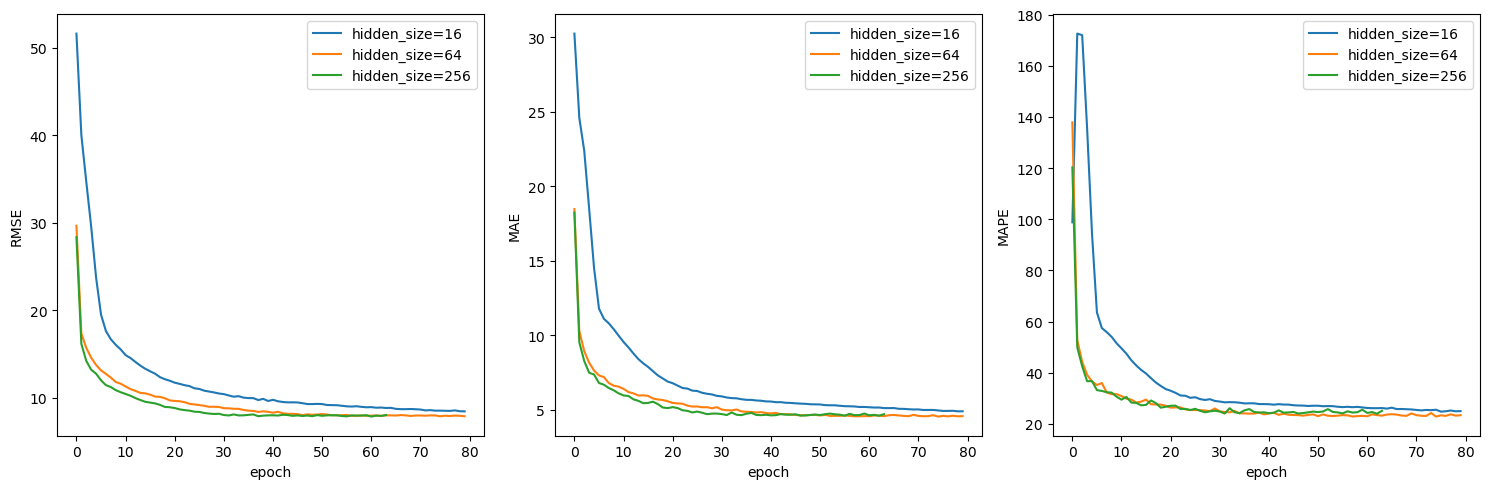

In [64]:
import matplotlib.pyplot as plt
##重定义plot_metric函数

def plot_metric(train_score_lst11, train_score_lst12, train_score_lst13):
    
    train_score_lst11 = np.array(train_score_lst11)
    train_score_lst12 = np.array(train_score_lst12)
    train_score_lst13 = np.array(train_score_lst13)
    
    plt.figure(figsize=(15, 5), dpi=100)
    
    plt.subplot(1, 3, 1)
    plt.plot(train_score_lst11[:,0], label='hidden_size=16')
    plt.plot(train_score_lst12[:,0], label='hidden_size=64')
    plt.plot(train_score_lst13[:,0], label='hidden_size=256')
    plt.xlabel('epoch')
    plt.ylabel('RMSE')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(train_score_lst11[:,1], label='hidden_size=16')
    plt.plot(train_score_lst12[:,1], label='hidden_size=64')
    plt.plot(train_score_lst13[:,1], label='hidden_size=256')
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(train_score_lst11[:,2], label='hidden_size=16')
    plt.plot(train_score_lst12[:,2], label='hidden_size=64')
    plt.plot(train_score_lst13[:,2], label='hidden_size=256')
    plt.xlabel('epoch')
    plt.ylabel('MAPE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 使用修正后的轮次调用示例
plot_metric(train_score_lst11, train_score_lst12, train_score_lst13)


## 对比不同batch_size

### batch_size = 16

In [72]:
batch_size = 16
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)
test_loader = data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)
train_loader

In [73]:
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = train_set.X.shape[-1]
hidden_size = 64
output_size = 1
seq_len = 12
lr = 0.0001
epochs = 80
loss_func = nn.MSELoss()

nn_rnn_21 = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True).to(device)
out_linear = nn.Sequential(nn.Linear(hidden_size, 1),
                           nn.LeakyReLU()).to(device)

optimizer = torch.optim.Adam(list(nn_rnn_21.parameters()) + list(out_linear.parameters()), lr)

train_loss_lst21, val_loss_lst21, \
    train_score_lst21, val_score_lst21, stop_epoch = train(nn_rnn_21, train_loader, val_loader, test_loader,
                                                       loss_func, KrakowData.denormalize, optimizer, epochs,
                                                       early_stop=20, device=device, output_model=out_linear)

*** epoch5, train loss 0.0016, train rmse 10.4614, val loss 0.0002, val rmse 3.469840, time use 1.372s
*** epoch10, train loss 0.0011, train rmse 8.6255, val loss 0.0001, val rmse 3.134218, time use 1.322s
*** epoch15, train loss 0.0010, train rmse 7.9309, val loss 0.0002, val rmse 4.001611, time use 1.393s
*** epoch20, train loss 0.0009, train rmse 7.4746, val loss 0.0001, val rmse 2.918951, time use 1.364s
*** epoch25, train loss 0.0009, train rmse 7.4624, val loss 0.0001, val rmse 2.880118, time use 1.240s
*** epoch30, train loss 0.0008, train rmse 7.3470, val loss 0.0001, val rmse 3.165551, time use 1.337s
*** epoch35, train loss 0.0008, train rmse 7.3549, val loss 0.0001, val rmse 3.165515, time use 1.344s
*** epoch40, train loss 0.0008, train rmse 7.4278, val loss 0.0001, val rmse 3.099136, time use 1.300s
*** epoch45, train loss 0.0008, train rmse 7.3172, val loss 0.0001, val rmse 2.828649, time use 1.167s
*** epoch50, train loss 0.0008, train rmse 7.4175, val loss 0.0001, val r

### batch_size = 64

In [57]:
batch_size = 64
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)
test_loader = data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)
train_loader

In [58]:
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = train_set.X.shape[-1]
hidden_size = 64
output_size = 1
seq_len = 12
lr = 0.0001
epochs = 80
loss_func = nn.MSELoss()

nn_rnn_22 = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True).to(device)
out_linear = nn.Sequential(nn.Linear(hidden_size, 1),
                           nn.LeakyReLU()).to(device)

optimizer = torch.optim.Adam(list(nn_rnn_22.parameters()) + list(out_linear.parameters()), lr)

train_loss_lst22, val_loss_lst22, \
    train_score_lst22, val_score_lst22, stop_epoch = train(nn_rnn_22, train_loader, val_loader, test_loader,
                                                       loss_func, KrakowData.denormalize, optimizer, epochs,
                                                       early_stop=20, device=device, output_model=out_linear)

*** epoch5, train loss 0.0025, train rmse 13.9089, val loss 0.0003, val rmse 4.888674, time use 0.375s
*** epoch10, train loss 0.0017, train rmse 11.4202, val loss 0.0002, val rmse 3.718429, time use 0.356s
*** epoch15, train loss 0.0014, train rmse 10.4086, val loss 0.0002, val rmse 3.639879, time use 0.357s
*** epoch20, train loss 0.0013, train rmse 9.7863, val loss 0.0001, val rmse 3.252777, time use 0.370s
*** epoch25, train loss 0.0011, train rmse 9.2744, val loss 0.0001, val rmse 3.265979, time use 0.350s
*** epoch30, train loss 0.0010, train rmse 8.9141, val loss 0.0001, val rmse 3.066067, time use 0.392s
*** epoch35, train loss 0.0010, train rmse 8.6290, val loss 0.0001, val rmse 3.064754, time use 0.374s
*** epoch40, train loss 0.0009, train rmse 8.4388, val loss 0.0001, val rmse 3.165065, time use 0.347s
*** epoch45, train loss 0.0009, train rmse 8.2227, val loss 0.0001, val rmse 3.278269, time use 0.384s
*** epoch50, train loss 0.0009, train rmse 8.1497, val loss 0.0001, val

### batch_size = 256

In [60]:
batch_size = 256
train_loader = data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
val_loader = data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)
test_loader = data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)
train_loader

In [61]:
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = train_set.X.shape[-1]
hidden_size = 64
output_size = 1
seq_len = 12
lr = 0.0001
epochs = 80
loss_func = nn.MSELoss()

nn_rnn_23 = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True).to(device)
out_linear = nn.Sequential(nn.Linear(hidden_size, 1),
                           nn.LeakyReLU()).to(device)

optimizer = torch.optim.Adam(list(nn_rnn_23.parameters()) + list(out_linear.parameters()), lr)

train_loss_lst_23, val_loss_lst_23, \
    train_score_lst_23, val_score_lst_23, stop_epoch = train(nn_rnn_23, train_loader, val_loader, test_loader,
                                                       loss_func, KrakowData.denormalize, optimizer, epochs,
                                                       early_stop=20, device=device, output_model=out_linear)

*** epoch5, train loss 0.0093, train rmse 27.3467, val loss 0.0008, val rmse 7.944716, time use 0.082s
*** epoch10, train loss 0.0044, train rmse 18.8622, val loss 0.0004, val rmse 5.907350, time use 0.073s
*** epoch15, train loss 0.0032, train rmse 16.2111, val loss 0.0002, val rmse 4.344671, time use 0.082s
*** epoch20, train loss 0.0027, train rmse 14.7434, val loss 0.0002, val rmse 4.134030, time use 0.096s
*** epoch25, train loss 0.0023, train rmse 13.7111, val loss 0.0002, val rmse 4.019840, time use 0.089s
*** epoch30, train loss 0.0021, train rmse 13.0496, val loss 0.0002, val rmse 3.895937, time use 0.090s
*** epoch35, train loss 0.0019, train rmse 12.4712, val loss 0.0002, val rmse 3.984703, time use 0.096s
*** epoch40, train loss 0.0018, train rmse 12.0548, val loss 0.0002, val rmse 3.832146, time use 0.095s
*** epoch45, train loss 0.0017, train rmse 11.7189, val loss 0.0002, val rmse 3.766457, time use 0.099s
*** epoch50, train loss 0.0016, train rmse 11.4226, val loss 0.00

### batch_size为16 64 256对比可视化

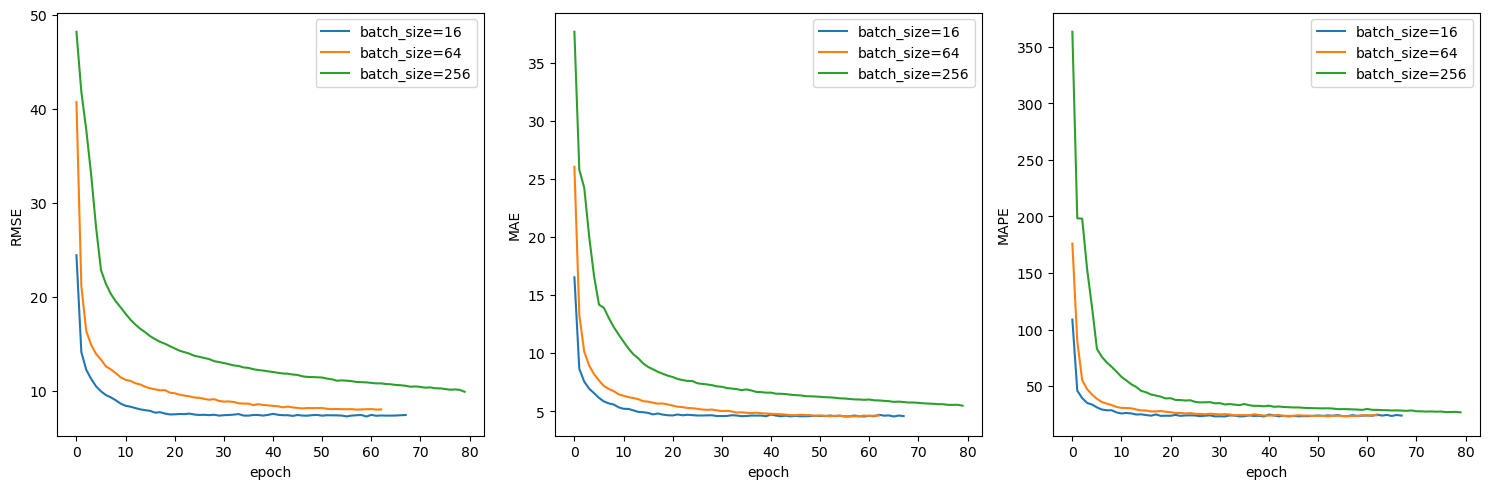

In [74]:
import matplotlib.pyplot as plt
##重定义plot_metric函数

def plot_metric(train_score_lst1, train_score_lst2, train_score_lst3):
    
    train_score_lst1 = np.array(train_score_lst1)
    train_score_lst2 = np.array(train_score_lst2)
    train_score_lst3 = np.array(train_score_lst3)
    
    plt.figure(figsize=(15, 5), dpi=100)
    
    plt.subplot(1, 3, 1)
    plt.plot(train_score_lst1[:,0], label='batch_size=16')
    plt.plot(train_score_lst2[:,0], label='batch_size=64')
    plt.plot(train_score_lst3[:,0], label='batch_size=256')
    plt.xlabel('epoch')
    plt.ylabel('RMSE')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(train_score_lst1[:,1], label='batch_size=16')
    plt.plot(train_score_lst2[:,1], label='batch_size=64')
    plt.plot(train_score_lst3[:,1], label='batch_size=256')
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(train_score_lst1[:,2], label='batch_size=16')
    plt.plot(train_score_lst2[:,2], label='batch_size=64')
    plt.plot(train_score_lst3[:,2], label='batch_size=256')
    plt.xlabel('epoch')
    plt.ylabel('MAPE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 使用修正后的轮次调用示例
plot_metric(train_score_lst21, train_score_lst22, train_score_lst_23)
